In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

Definimos una variedad $M$ tipo Lorentziana, dimensión 4 y un sistema de coordenadas esféricas $X$.

In [3]:
M=Manifold(4,'M', structure='Lorentzian')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

Definimos una aplicación de M a R3

In [4]:
#variedad R3
R3=Manifold(3,'R^3', latex_name=r'\mathbb{R}^3') 
#carta en R3
X3.<x,y,z>=R3.chart() 

#La aplicación se llama "to_R3". Entre los corchetes se
#escribe X3_i(X)
to_R3=M.diff_map(R3, {(X,X3): [r*sin(th)*cos(ph),
                               r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Definimos la métrica de Shwarzschild

In [5]:
#métrica g en la variedad M
g=M.metric()
#definimos la variable m. Esta representa la masa gravitacional sentida
#por un observador localizado a grandes valores de r (Gorgoulhon p127)
m=var('m'); assume (m>=0) 
#definimos cada una de las componentes g en la carta X
g[0,0],g[1,1]=-(1-2*m/r),1/(1-2*m/r)
g[2,2],g[3,3]=r^2,(r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [6]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

Símbolos de Christoffel para $\boldsymbol{g}$

In [7]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

Para definir la geodésica, definimos un punto inicial y un vector tangente

In [8]:
p0=M.point((0,8*m,pi/2,0),name='p_0')

v0 = M.tangent_space(p0)((1.3, 0.0465692226690544, 0, 0.065/m), name='v_0')
v0.display()

v_0 = 1.30000000000000 d/dt + 0.0465692226690544 d/dr + 0.0650000000000000/m d/dph

In [9]:
v=matrix(v0[:])
mu2=v*g[:]*v.transpose()
mu2

[-(-6.76*m^4 + 6.76*m^3*r - 1.6878313075*m^2*r^2 + (-0.00845*m*r^3 + 0.004225*r^4)*sin(th)^2)/(2*m^3*r - m^2*r^2)]

Declaramos una geodésica con estas condiciones iniciales denotando por $s$ el parámetro afín (tiempo propio), con $(s_{min},s_{max})=(0,1500m)$

In [10]:
#declaramos el parámetro afín s como una variable
s=var('s')

## Geodésica integrada en la variedad Lorentziana $M$ 4-dimensional

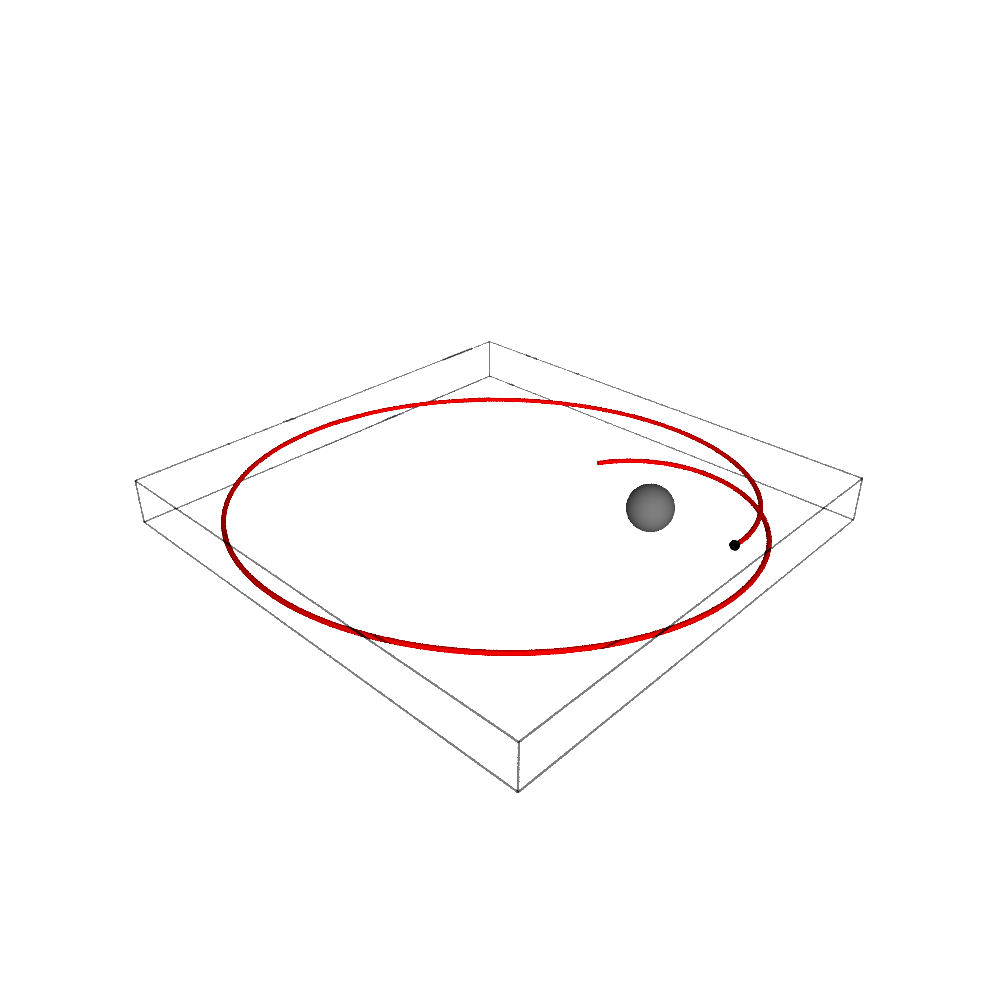

In [11]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,700),v0)
geod.display()
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
#show(graph, viewer='threejs', online=True)
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

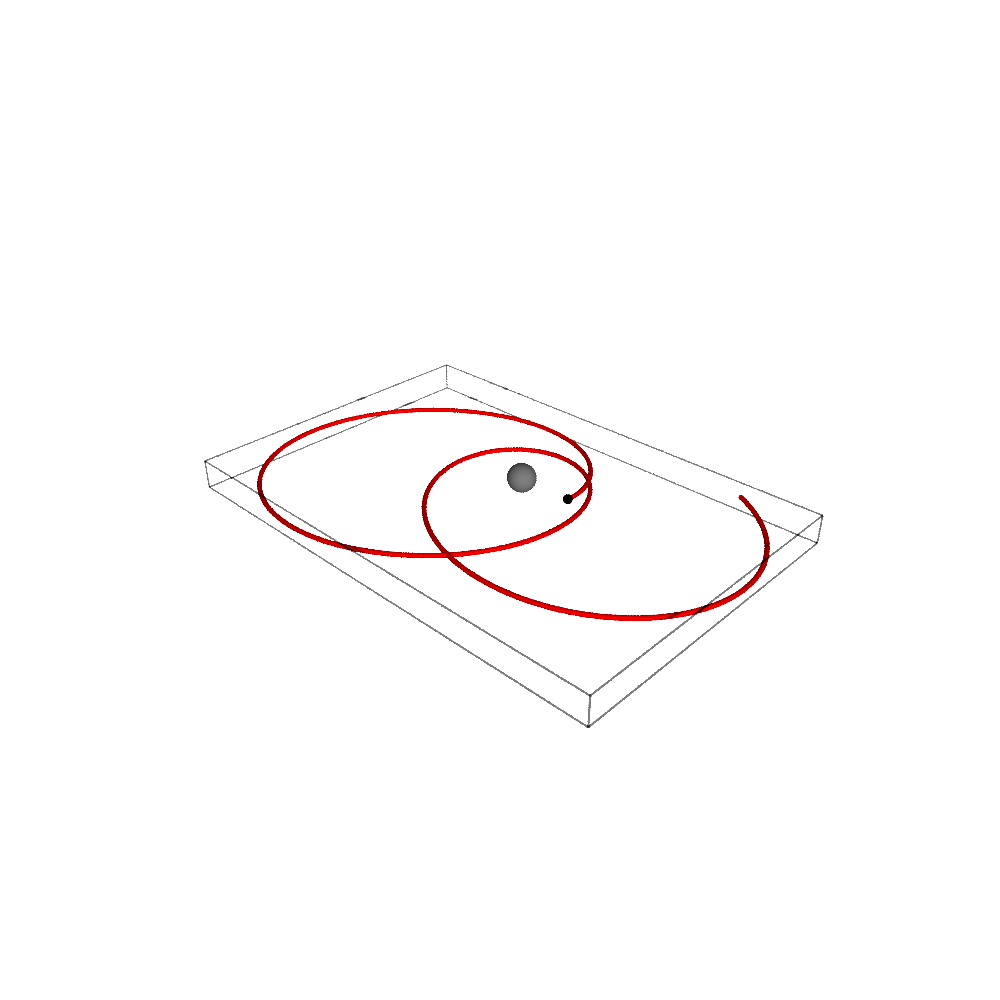

In [12]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,1200),v0)
geod.display()
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
#show(graph, viewer='threejs', online=True)
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

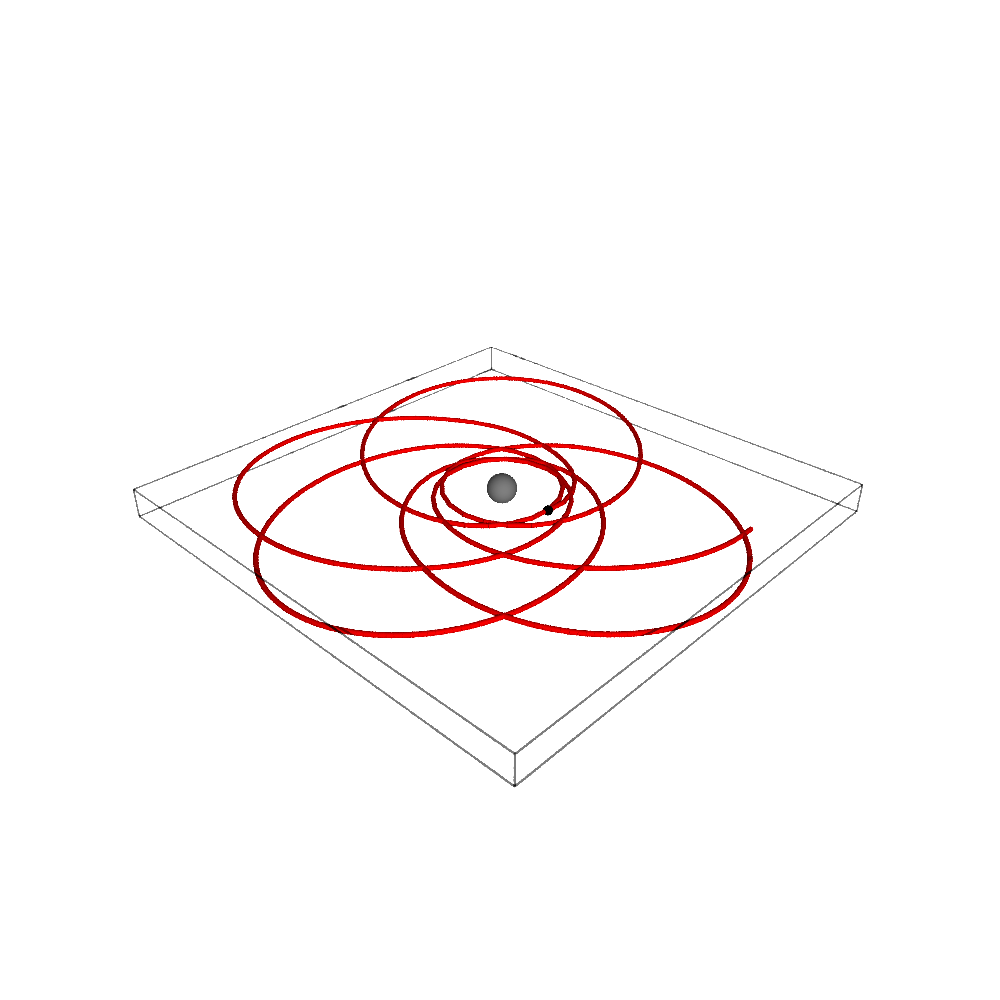

In [52]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,3000),v0)
geod.display()
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
#show(graph, viewer='threejs', online=True)
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

## Geodésicas en $r=4$

$l/m=3.520$

In [55]:

p2=M.point((0,4,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.884, 0, 0, 0.22), name='v_2')
v2.display()

v_2 = 1.88400000000000 d/dt + 0.220000000000000 d/dph

In [62]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,12),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$l/m=3.464$

In [64]:
p2=M.point((0,4,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((2, 0, 0, 0.25), name='v_2')
v2.display()

v_2 = 2 d/dt + 0.250000000000000 d/dph

In [66]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,40),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$l/m=4.160$

In [67]:

p2=M.point((0,4,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((2.04, 0, 0, 0.26), name='v_2')
v2.display()

v_2 = 2.04000000000000 d/dt + 0.260000000000000 d/dph

In [68]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,100),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

## Geodésicas para $r=6$

$l/m=3.464,\ \varepsilon=0.943$

In [96]:
p2=M.point((0,6,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.414213566, 0, 0, 0.096225046
), name='v_2')
v2.display()

v_2 = 1.41421356600000 d/dt + 0.0962250460000000 d/dph

In [97]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,100),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$l/m=3.600,\ \varepsilon=0.952$

In [108]:
p2=M.point((0,6,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.4283, 0, 0, 0.1), name='v_2')
v2.display()

v_2 = 1.42830000000000 d/dt + 0.100000000000000 d/dph

In [109]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,200),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$l/m=3.96,\ \varepsilon=0.978$

In [110]:
p2=M.point((0,6,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.467, 0, 0, 0.11), name='v_2')
v2.display()

v_2 = 1.46700000000000 d/dt + 0.110000000000000 d/dph

In [111]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,1000),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$l/m=4.248,\ \varepsilon=1.000$

In [112]:
p2=M.point((0,6,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.501, 0, 0, 0.1180), name='v_2')
v2.display()

v_2 = 1.50100000000000 d/dt + 0.118000000000000 d/dph

In [113]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,1000),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

## Geodésicas para $r=20$

$l/m=3.48,\ \varepsilon=0.963$

In [127]:
p2=M.point((0,20,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.070, 0, 0, 0.0087), name='v_2')
v2.display()

v_2 = 1.07000000000000 d/dt + 0.00870000000000000 d/dph

In [132]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,160),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$l/m=4.851,\ \varepsilon=0.976$

In [133]:
p2=M.point((0,20,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.085, 0, 0, 0.01213), name='v_2')
v2.display()

v_2 = 1.08500000000000 d/dt + 0.0121300000000000 d/dph

In [136]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,600),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object

$1$

$l/m=6.660,\ \varepsilon=1.00$

In [141]:
p2=M.point((0,20,pi/2,0),name='p_2')

v2 = M.tangent_space(p2)((1.111, 0, 0, 0.0166), name='v_2')
v2.display()

v_2 = 1.11100000000000 d/dt + 0.0166000000000000 d/dph

In [145]:
#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod2=M.integrated_geodesic(g,(s,0,1000),v2)

sol2 = geod2.solve(parameters_values={m: 1}) 
interp2=geod2.interpolate()


graph = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=10000,
                           thickness=2, label_axes=False)

graph += p2.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        

graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)
#show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Graphics3d Object